# K Means Clustering

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Stitch-bleu/inde-577-project/edit/main/Unsupervised/1_k-Means%20Clustering/K_Means_Clustering.ipynb)

## Introduction
K-means clustering is an unsupervised machine learning technique widely used for identifying patterns and grouping similar data points into clusters. The algorithm works by assigning each data point to one of k clusters, where k is a predefined number. K-means minimizes the variance within each cluster by iteratively updating the cluster centroids (the average location of points in each cluster) until the centroids no longer change significantly.

The process starts with an initial assignment of centroids, and each data point is assigned to the closest centroid, creating a cluster. The centroids are then recalculated as the mean of all points in their assigned cluster. This process repeats until the clusters stabilize. K-means is highly effective in revealing the underlying structure of data and is particularly useful for segmenting customers, market research, document clustering, and image compression.

In this project, we’ll apply K-means clustering, assess the quality of the clustering, and visualize the results to gain insights into the dataset’s structure.


## 1. Data

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

heart_disease = fetch_ucirepo(id=45)
data = heart_disease.data.features
target = heart_disease.data.targets  
print(heart_disease.metadata)
print("First few rows of the dataset:")
print(data.head())

imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(data)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_imputed)

print("\nData has been preprocessed, missing values handled, and scaled. Ready for K-means clustering.")


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

## 2. Determine Optimal Number of Clusters using Elbow Method

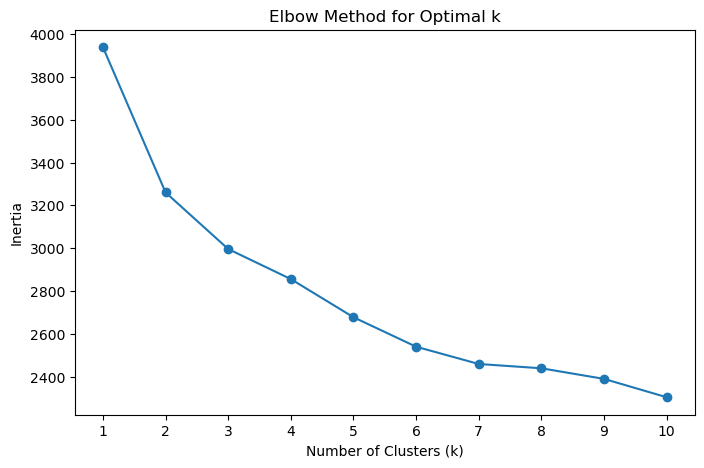

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = range(1, 11)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.show()


## 3. Fit K-means Model and Visualize Clusters

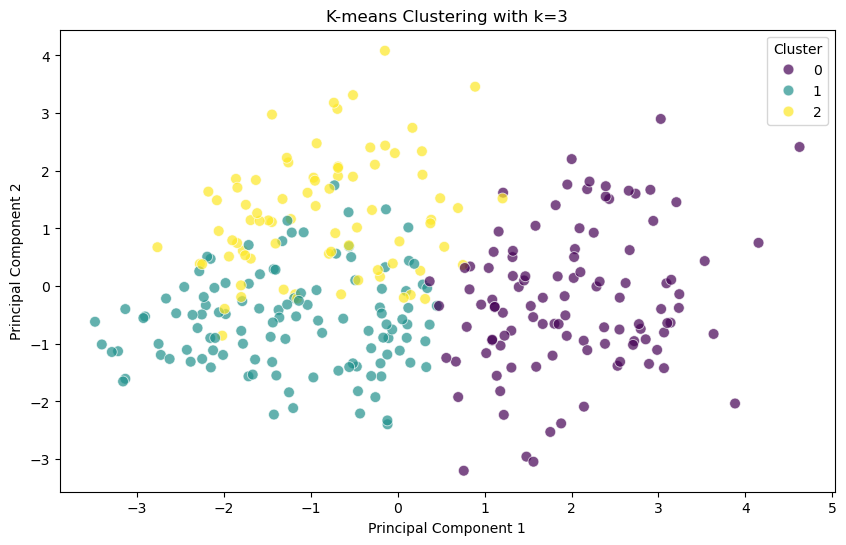

In [12]:
optimal_k = 3 

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_

data['Cluster'] = cluster_labels

import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=60, alpha=0.7)
plt.title(f"K-means Clustering with k={optimal_k}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


## 4. Evaluate Clustering with Silhouette Score

In [15]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(X_scaled, cluster_labels)

print(f"Silhouette Score for k={optimal_k}: {sil_score:.4f}")


Silhouette Score for k=3: 0.1286
